# 5003 HW1

## Zhang Juntao 

Please 'run all cells' to get all results or directly see in my GitHub: https://github.com/KlausZhangjt/HKUST_DDM

### PART A

$X \sim N\left(\mu_1, \sigma_1^2\right), Y \sim N\left(\mu_2, \sigma_2^2\right)$ and $X \perp Y$ $\Rightarrow Z=X+Y \sim N\left(\mu_1+\mu_2, \sigma_1^2+\sigma_2^2\right)$

Proof: 

Through characteristic function, from the characteristic function of normal distribution, we have:

$\phi_X(t)=E\left(e^{i t X}\right)=\exp \left(i t \mu_1-\frac{1}{2} t^2 \sigma_1^2\right)$

$\phi_Y(t)=E\left(e^{i t Y}\right)=\exp \left(i t \mu_2-\frac{1}{2} t^2 \sigma_2^2\right)$

Since $Z=X+Y$,

$\phi_Z(t)=E\left(e^{i t Z}\right)=E\left(e^{i t(X+Y)}\right)=E\left(e^{i t X} \cdot e^{i t Y}\right)$

since $X \perp Y$, we have,

$\phi_Z(t)=E\left(e^{i t X}\right) \cdot E\left(e^{i t Y}\right)$
$=\phi_X(t) \phi_Y(t)$
$=\exp \left[i t\left(\mu_1+\mu_2\right)-\frac{1}{2} t^2\left(\sigma_1^2+\sigma_2^2\right)\right]$

$\Rightarrow \quad Z \sim N\left(\mu_1+\mu_2, \sigma_1^2+\sigma_2^2\right)$


Therefore:

$X \sim N\left(0, 1\right), Y \sim N\left(1, 2\right)$ and $X \perp Y$ $\Rightarrow Z=X+Y \sim N\left(1, 3\right)$




### PART B

#### Some required packages 

In [241]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import normaltest
from scipy import stats
from collections import namedtuple 

#### Generate two-dimension normal distribution R.V. to satisfy $X \perp Y$

In [242]:
mean = (0, 1)
cov = np.array([[1, 0],[0, 2]])
np.random.seed(777)
M = np.random.multivariate_normal(mean, cov, 70000, check_valid ='warn')  
M = pd.DataFrame(M)
M.columns = ['X', 'Y']
M.describe()

,X,Y
count,70000.000000,70000.000000
mean,-0.001013,0.999666
std,1.002169,1.415945
min,-4.894525,-5.692391
25%,-0.676549,0.042122
50%,-0.005188,0.993028
75%,0.673741,1.951223
max,4.560247,7.116437


#### Verify $X \perp Y$ from the smaple correlation coefficient

In [243]:
M.corr()

,X,Y
X,1.000000,0.000024
Y,0.000024,1.000000


#### Get the generated sequence of variable Z

In [244]:
X = M['X']
Y = M['Y']
Z = X + Y
Z

0       -0.484972
1        0.194177
2        3.048010
3        0.844534
4       -0.475882
           ...   
69995    2.192422
69996   -0.424248
69997    2.737028
69998    1.155196
69999    1.145126
Length: 70000, dtype: float64

In [245]:
print('The sample mean of sequence Z is: ', np.mean(Z))
print('The sample variance of sequence Z is: ', np.var(Z))

The sample mean of sequence Z is:  0.9986535363024177
The sample variance of sequence Z is:  3.009267753431769


#### Plot the density plot of X, Y, Z

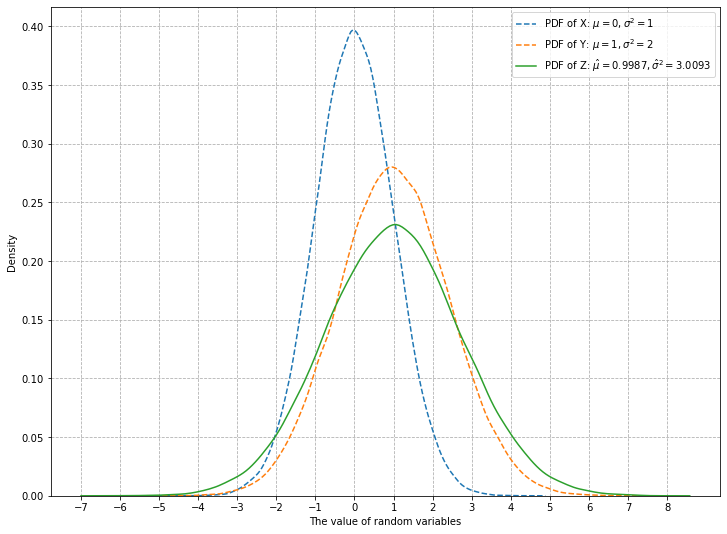

In [246]:
plt.figure(figsize=(12, 9))
sns.kdeplot(X, label = 'PDF of X: $\mu = 0,\sigma^{2} = 1$', linestyle='--')
sns.kdeplot(Y, label = 'PDF of Y: $\mu = 1,\sigma^{2} = 2$', linestyle='--')
sns.kdeplot(Z, label = 'PDF of Z: $\hat{\mu} = 0.9987,\hat{\sigma}^{2} = 3.0093$')
plt.legend()
plt.grid(ls='--')



x_ticks = np.arange(-7, 9, 1)
plt.xticks(x_ticks)

plt.xlabel('The value of random variables')
plt.ylabel('Density')

plt.show()

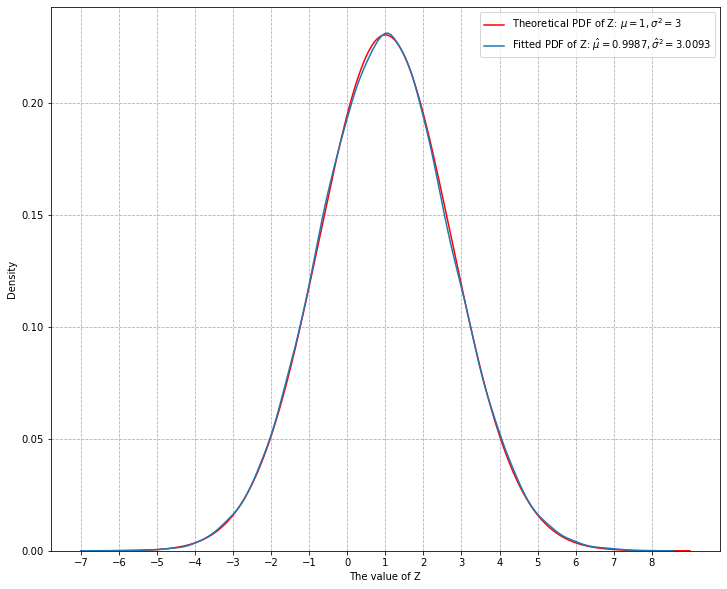

In [247]:
plt.figure(figsize=(12, 10))

Z_step = np.arange(-7, 9, 0.001)
Z_theoretical = norm.pdf(Z_step, loc=1, scale=np.sqrt(3))
plt.plot(Z_step,Z_theoretical, color='r', label='Theoretical PDF of Z: $\mu = 1,\sigma^{2} = 3$')

sns.kdeplot(Z, label = 'Fitted PDF of Z: $\hat{\mu} = 0.9987,\hat{\sigma}^{2} = 3.0093$')

plt.legend()
plt.grid(ls='--')

x_ticks = np.arange(-7, 9, 1)
plt.xticks(x_ticks)

plt.xlabel('The value of Z')
plt.ylabel('Density')

plt.show()

#### Some hypothesis test

##### Normalizaion test

In [248]:
statistic, p_value = normaltest(Z)
print('The value of test statistics is: ',statistic)
print('The p_value is: ',p_value)
if p_value > 0.05:
    print('There is no reason for us to reject null hypothesis,\nwhich means this variable follows a normal distribution.')

The value of test statistics is:  5.56097100991996
The p_value is:  0.06200839468483913
There is no reason for us to reject null hypothesis,
which means this variable follows a normal distribution.


##### Mean test

In [249]:
s, p = stats.ttest_1samp(Z,1)
print('The p_value is: ',p)
if p >0.05:
    print('There is no reason for us to reject null hypothesis,\nwhich shows mean is equal to 1')
else:
    print('Mean is not equal to 1')

The p_value is:  0.8372935741262604
There is no reason for us to reject null hypothesis,
which shows mean is equal to 1


##### Variance test

In [250]:
'''
formulation to calculate p-value
'''
def pvalue(cdf,x,*params,side='two-sided'):
    n=len(params)    
    P=None
    if n==0:
        P=cdf(x)
    elif n==1:
        P=cdf(x,params[0])
    elif n==2:
        P=cdf(x,params[0],params[1])
    elif n==3:
        P=cdf(x,params[0],params[1],params[2])
    else:
        raise Exception("Params is wrong!")
    
    if side=='less':#alternative hypothesis: sample mean samller than mu
        P=P
    elif side=='greater':#alternative hypothesis: sample mean lager than mu
        P = 1-P
    elif side=='two-sided':#alternative hypothesis: sample mean not equal to mu
        if P<1/2: 
            P=2*P            
        else: 
            P=2*(1-P)
    return P

In [251]:
'''
Variance test, two situation: S1.mu is known; S2.mu is unknown
'''
VTResultSet = namedtuple('VTResultSet',['Var','DF','Chisq2','P_value'])
def var_test(x, sigma2=1, mu=float('Inf'),side='two-sided'):
    n=len(x)
    if mu<float('Inf'):
        s2=np.sum((x-mu)**2)/n
        df=n
    else:
        s2=stats.tvar(x)
        df=n-1
    ch2=df*s2/sigma2
    P=pvalue(stats.chi2.cdf,ch2,df,side=side)
    return VTResultSet(Var=s2,DF=df,Chisq2=ch2,P_value=P)

In [252]:
print(var_test(Z,sigma2=3))
if p > 0.05:
    print('There is no reason for us to reject null hypothesis,\nwhich shows variance is equal to 3')
else:
    print('Variance is not equal to 3')

VTResultSet(Var=3.009310743585253, DF=69999, Chisq2=70216.24758007472, P_value=0.5606984142205522)
There is no reason for us to reject null hypothesis,
which shows variance is equal to 3


### Conclusion

Through the figures and hypothesis test we did above, we can conclude that the generated sequence of Z according to the 
given PDFs of X and Y follows a normal distribution as $\Rightarrow Z \sim N\left(1, 3\right)$